Populating the interactive namespace from numpy and matplotlib
/capella-data/sellers/lya_sandbox/


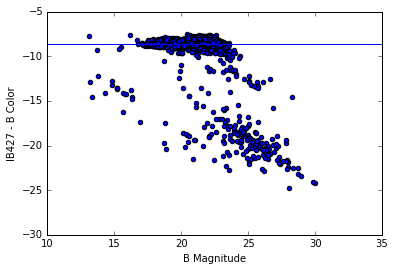

In [2]:
%pylab inline
from astropy.io import fits
import os
import glob
import re
import shutil
from astropy.io import ascii
from scipy.interpolate import interp1d
from scipy import stats

#Change as needed

#path = os.getcwd()

path = '/capella-data/sellers/lya_sandbox/'

os.chdir(path)

#Essentially a duplicate of the last chunk of initial_detection.ipynb
#Cause I screwed something up

#Finding everything with a 3-sigma IB427 excess:

sub_dir = glob.glob('*/')



color_tot = []
b_mag_tot = []

for i in sub_dir:
    os.chdir(path + i)
    ib_cat = glob.glob("*_ib.cat")[0]
    comb_cat = glob.glob("*_comb.cat")[0]
    
    cat_b = ascii.read(comb_cat)
    cat_ib = ascii.read(ib_cat)
    
    b_mag = cat_b['MAG_AUTO']
    ib_mag = cat_ib['MAG_AUTO']

    ib_pos_y = cat_ib['Y_IMAGE']
    ib_pos_x = cat_ib['X_IMAGE']

    cat_num_ib = cat_ib['NUMBER']
    cat_num_b = cat_b['NUMBER']
    
    radius = cat_ib["FLUX_RADIUS"]
    
    color = ib_mag - b_mag

    overflow_cut = color < -7.

    color = color[overflow_cut]
    b_mag = b_mag[overflow_cut]
    ib_pos_x = ib_pos_x[overflow_cut]
    ib_pos_y = ib_pos_y[overflow_cut]
    cat_num_ib = cat_num_ib[overflow_cut]
    cat_num_b = cat_num_b[overflow_cut]
    radius1 =radius[overflow_cut]
    
    overflow_cut2 = (b_mag > 13.) & (b_mag < 30.)

    color = color[overflow_cut2]
    b_mag = b_mag[overflow_cut2]
    ib_pos_x = ib_pos_x[overflow_cut2]
    ib_pos_y = ib_pos_y[overflow_cut2]
    cat_num_ib = cat_num_ib[overflow_cut2]
    cat_num_b = cat_num_b[overflow_cut2]
    radius1 = radius1[overflow_cut2]
    
    plt.scatter(b_mag,color)
    plt.axhline(np.mean(color))
    plt.xlabel("B Magnitude")
    plt.ylabel("IB427 - B Color")
    plt.savefig("CMD.png")
    
    plt.close()
    
    for i in color:
        color_tot.append(i)
    for i in b_mag:
        b_mag_tot.append(i)
        
    reg_cut = color < (np.mean(color) - 3. * np.std(color))
    reg_x = ib_pos_x[reg_cut]
    reg_y = ib_pos_y[reg_cut]
    cat_num_ib1 = cat_num_ib[reg_cut]
    cat_num_b1 = cat_num_b[reg_cut]
    reg_color = color[reg_cut]
    reg_rad = radius1[reg_cut]
    
    #create and write a region file for visual check
    region_file = open("ib_excess.reg","w")

    region_file.write("# Region file format: DS9 version 4.0\n")

    for i,j in zip(reg_x,reg_y):
        region_file.write("physical;circle("+str(i)+","+str(j)+",30) # color = green \n")
    
    region_file.close()
    
    
    #Files containing catalog numbers of Lya blob candidates. Can be used to do a np.where later
    ib_candidates = open("ib_candidates.txt","w")
    ib_candidates.write("#   1 NUMBER                 Running object number \n")
    ib_candidates.write("#   2 FLUX_RADIUS            Fraction-of-light radii                                    [pixel] \n")
    ib_candidates.write("#   3 COLOR \n")
    
    i = 0
    while i < len(cat_num_ib1):
        ib_candidates.write(str(cat_num_ib[i])+ "    ")
        ib_candidates.write(str(reg_rad[i])+ "    ")
        ib_candidates.write(str(reg_color[i]) + "\n")
        i = i + 1
    ib_candidates.close()
    
    b_candidates = open("b_candidates.txt","w")
    b_candidates.write("#   1 NUMBER                 Running object number \n")
    b_candidates.write("#   2 FLUX_RADIUS            Fraction-of-light radii                                    [pixel] \n")
    b_candidates.write("#   3 COLOR \n")
    
    i = 0
    while i < len(cat_num_b1):
        b_candidates.write(str(cat_num_b[i])+ "    ")
        b_candidates.write(str(reg_rad[i])+ "    ")
        b_candidates.write(str(reg_color[i]) + "\n")
        i = i + 1
    b_candidates.close()
    
       
    reg_cut2 = color < -8.8
    reg_x2 = ib_pos_x[reg_cut2]
    reg_y2 = ib_pos_y[reg_cut2]
    cat_num_ib2 = cat_num_ib[reg_cut2]
    cat_num_b2 = cat_num_b[reg_cut2]
    reg_color2 = color[reg_cut2]
    reg_rad2 = radius1[reg_cut2]

    #create and write a region file for visual check
    region_file = open("ib_excess_constcut.reg","w")

    region_file.write("# Region file format: DS9 version 4.0\n")

    for i,j in zip(reg_x2,reg_y2):
        region_file.write("physical;circle("+str(i)+","+str(j)+",30) # color = green \n")
    
    region_file.close()
    
    
    #Files containing catalog numbers of Lya blob candidates. Can be used to do a np.where later
    ib_candidates2 = open("ib_candidates_constcut.txt","w")
    ib_candidates2.write("#   1 NUMBER                 Running object number \n")
    ib_candidates2.write("#   2 FLUX_RADIUS            Fraction-of-light radii                                    [pixel] \n")
    ib_candidates2.write("#   3 COLOR \n")
    
    i = 0
    while i < len(cat_num_ib2):
        ib_candidates2.write(str(cat_num_ib2[i])+ "    ")
        ib_candidates2.write(str(reg_rad2[i])+ "    ")
        ib_candidates2.write(str(reg_color2[i]) + "\n")
        i = i + 1
    ib_candidates2.close()
    
    b_candidates2 = open("b_candidates_constcut.txt","w")
    b_candidates2.write("#   1 NUMBER                 Running object number \n")
    b_candidates2.write("#   2 FLUX_RADIUS            Fraction-of-light radii                                    [pixel] \n")
    b_candidates2.write("#   3 COLOR \n")
    
    i = 0
    while i < len(cat_num_b2):
        b_candidates2.write(str(cat_num_b2[i])+ "    ")
        b_candidates2.write(str(reg_rad2[i])+ "    ")
        b_candidates2.write(str(reg_color2[i]) + "\n")
        i = i + 1
    b_candidates2.close()

    
os.chdir(path)
print(path)
plt.scatter(b_mag_tot,color_tot)
plt.axhline(np.mean(color_tot))
plt.xlabel("B Magnitude")
plt.ylabel("IB427 - B Color")
plt.savefig("comb_CMD.png")